Download Data

In [3]:
!wget https://www.dropbox.com/s/en2g7ml1m5a8yrd/Datasets.zip?dl=0

--2022-05-22 04:25:36--  https://www.dropbox.com/s/en2g7ml1m5a8yrd/Datasets.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/en2g7ml1m5a8yrd/Datasets.zip [following]
--2022-05-22 04:25:36--  https://www.dropbox.com/s/raw/en2g7ml1m5a8yrd/Datasets.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0fc788755914abb7eaa8ba7ea8.dl.dropboxusercontent.com/cd/0/inline/BlsBeRS_EFKuKLn-Epwfe2T2a_pD2Jtpt3CcVBCpaUI9xMuxJbpW_0N9boOel-lI1MGsRtov3eXB_K7rl5JFi1fG-CTGwKmuOOWnhmice8aAJ-ppFHGgP5OJtS-px1K4H-KVN3ML4KUq7CH--VNa6elQ_D_IE_LEZDsfzPLhNNBT6Q/file# [following]
--2022-05-22 04:25:37--  https://uc0fc788755914abb7eaa8ba7ea8.dl.dropboxusercontent.com/cd/0/inline/BlsBeRS_EFKuKLn-Epwfe2T2a_pD2Jtpt3CcVBCpaUI9xMuxJbpW_0N9boOe

Delete files

In [ ]:
!rm -rf train
!rm -rf test
!rm -rf dataset.zip
!rm -rf test.zip
# !rm -rf data

Download Data

Unzip data

In [4]:
!unzip /content/Datasets.zip?dl=0.1

Streaming output truncated to the last 5000 lines.
  inflating: Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/e8a2dfe7-c46d-4557-a125-339aed949dac___YLCV_GCREC 5459.JPG  
  inflating: Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/e8a59634-b48a-40d9-8d49-1cf433b62b74___YLCV_NREC 2574.JPG  
  inflating: Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/e8a73a80-16f4-46b0-825b-01feef1bd203___UF.GRC_YLCV_Lab 01562.JPG  
  inflating: Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/e8d36fe8-3537-4cef-8506-7a7b755d780c___UF.GRC_YLCV_Lab 09592.JPG  
  inflating: Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/e8d9d545-23b5-494b-a6ad-f7fe9f3261ff___UF.GRC_YLCV_Lab 09440.JPG  
  inflating: Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/e8ef5313-e40d-4e48-8697-8f07df4475b0___YLCV_GCREC 5219.JPG  
  inflating: Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/e8f1f392-e244-46a0-8852-8fbe2e944fae___YLCV_GCREC 5386.JPG  
  inflating: Datasets/train/Tomato__

Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy
import cv2

Mobilenet Model

In [16]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=10 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [17]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

Training data

In [18]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/Datasets/train", 
                                               target_size=(224,224), 
                                               batch_size=64,
                                  )


train_data.class_indices

Found 18345 images belonging to 10 classes.


{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

Testing Data

In [19]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/Datasets/train", 
                                           target_size=(224,224), 
                                           batch_size=64,
                                  )

Found 18345 images belonging to 10 classes.


Data Visualize

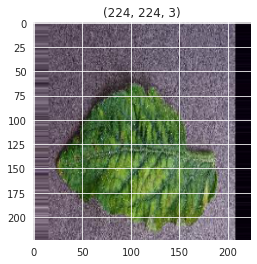

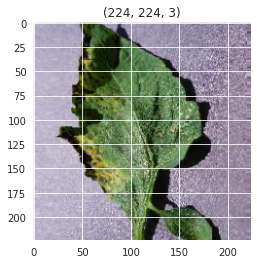

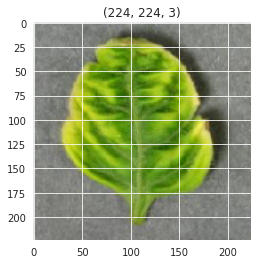

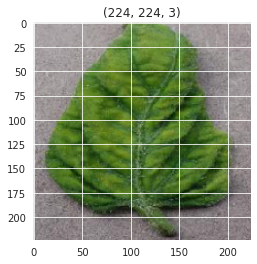

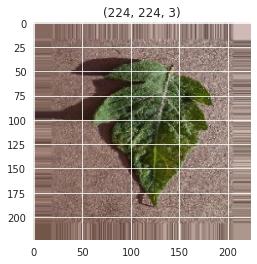

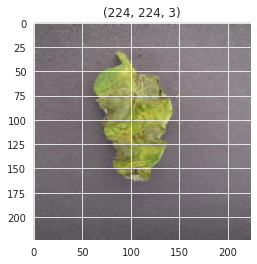

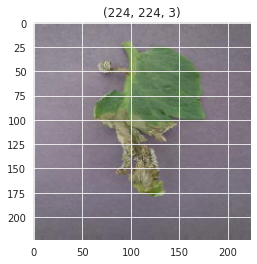

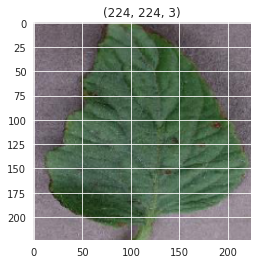

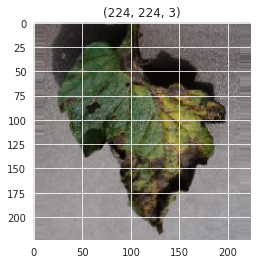

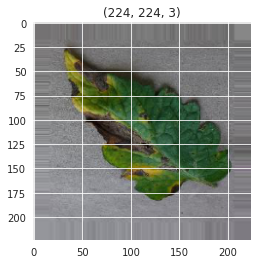

In [20]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

Earling stopping and Model Check point

In [21]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

Mobilenet datafit

In [22]:
hist = model.fit_generator(train_data, 
                            
                           epochs= 5, 
                           validation_data= val_data, 
                
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
287/287 [==============================] - ETA: 0s - loss: 2.0406 - accuracy: 0.8112
Epoch 1: val_accuracy improved from -inf to 0.89152, saving model to best_model.h5
287/287 [==============================] - 251s 835ms/step - loss: 2.0406 - accuracy: 0.8112 - val_loss: 0.7981 - val_accuracy: 0.8915
Epoch 2/5
287/287 [==============================] - ETA: 0s - loss: 0.7454 - accuracy: 0.9113
Epoch 2: val_accuracy improved from 0.89152 to 0.93104, saving model to best_model.h5
287/287 [==============================] - 233s 813ms/step - loss: 0.7454 - accuracy: 0.9113 - val_loss: 0.5511 - val_accuracy: 0.9310
Epoch 3/5
287/287 [==============================] - ETA: 0s - loss: 0.7325 - accuracy: 0.9265
Epoch 3: val_accuracy improved from 0.93104 to 0.94342, saving model to best_model.h5
287/287 [==============================] - 232s 808ms/step - loss: 0.7325 - accuracy: 0.9265 - val_loss: 0.5087 - val_accuracy: 0.9434
Epoch 4/5
287/287 [==============================] - ET

In [23]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()



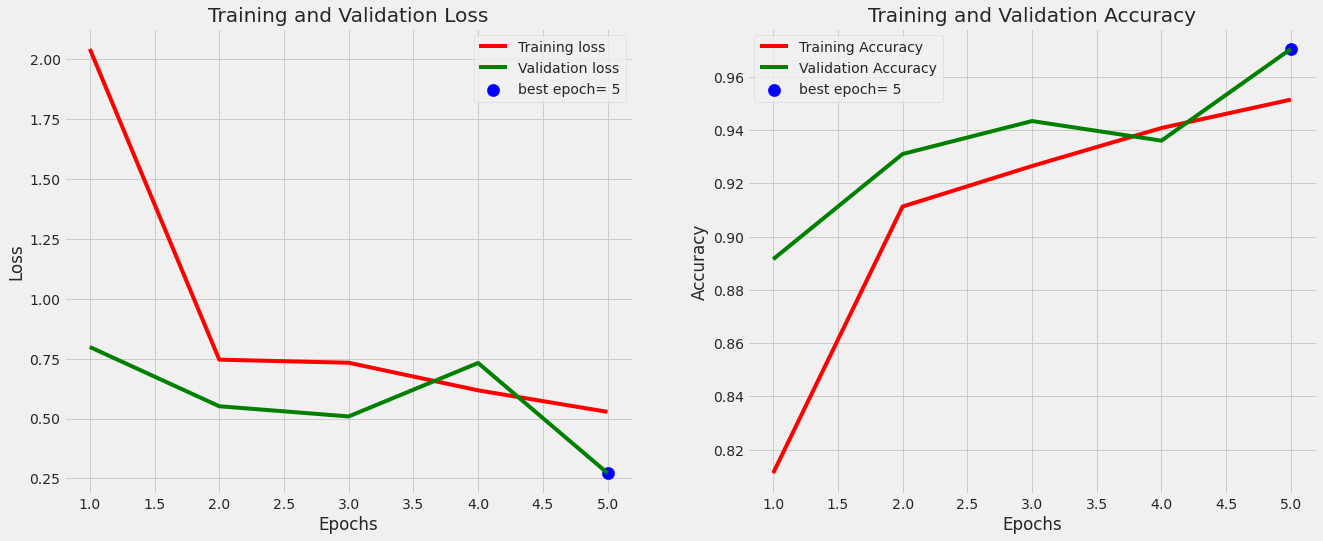

In [24]:
tr_plot(hist,0)

Mobilenet Model load

In [25]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [26]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

Creating Graphs

In [27]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

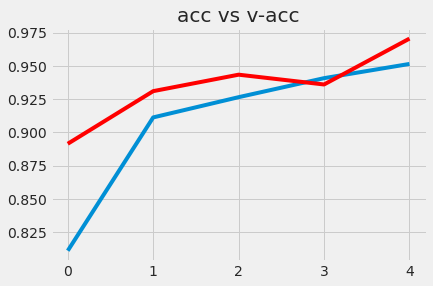

In [28]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

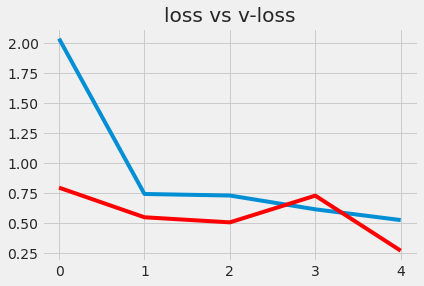

In [29]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

Mapping Values

In [30]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

Testing

 the image is of Tomato___Early_blight


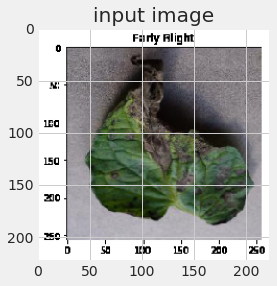

In [31]:
# path for the image to see if it predics correct class

path = "/content/Datasets/test/EarlyBlight.png"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [32]:
#Confution Matrix and Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_data.classes, y_pred))
print('Classification Report')
target_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy']
print(classification_report(val_data.classes, y_pred, target_names=target_names))

Confusion Matrix
[[179 144 169 202 137 160 194 200 164 153]
 [193 205 176 176 176 190 207 218 206 173]
 [198 171 193 186 180 192 172 197 159 203]
 [167 172 177 195 184 182 213 209 172 211]
 [160 159 179 186 177 167 199 166 169 183]
 [175 195 169 171 149 147 193 182 192 168]
 [185 186 179 176 191 168 195 177 198 172]
 [186 200 210 198 165 181 204 208 202 207]
 [177 176 168 189 180 179 185 165 186 185]
 [189 169 223 193 189 170 202 219 167 205]]
Classification Report
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.10      0.11      0.10      1702
                        Tomato___Early_blight       0.12      0.11      0.11      1920
                         Tomato___Late_blight       0.10      0.10      0.10      1851
                           Tomato___Leaf_Mold       0.10      0.10      0.10      1882
                  Tomato___Septoria_leaf_spot       0.10      0.10      0.10      1745
Tomato_